In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
file_path = 'GlobalLandTemperaturesByState.csv'
data = pd.read_csv(file_path)

data = data[['dt', 'AverageTemperature', 'State']]

data['dt'] = pd.to_datetime(data['dt'])
data = data[data['dt'].dt.year > 2000]

states = ['Wyoming', 'Nebraska', 'South Dakota']
data = data[data['State'].isin(states)]

data.shape

(459, 3)

In [5]:
avg_temp_data = (
    data.groupby('dt')['AverageTemperature']
    .mean()
    .reset_index()
    .rename(columns={'AverageTemperature': 'AverageTemperatureAcrossStates'}))

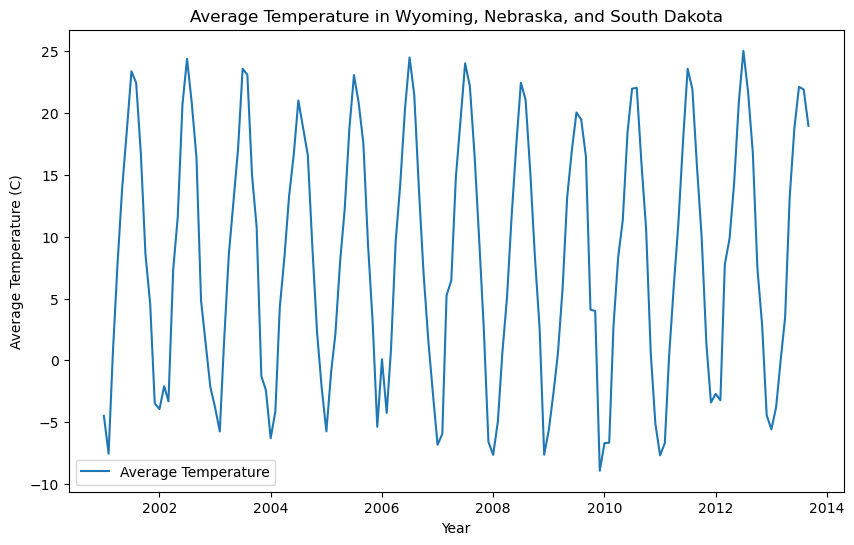

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_data['dt'], avg_temp_data['AverageTemperatureAcrossStates'], label='Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (C)')
plt.title('Average Temperature in Wyoming, Nebraska, and South Dakota')
plt.legend()
plt.show()

In [23]:
avg_temp_data['NumericDate'] = avg_temp_data['dt'].apply(lambda x: x.toordinal())

def model_func(x, a, b, c, d):
    return a * np.cos(b * x + c) + d

initial_guess = [10, 2 * np.pi / 365, 0, 15]

x_data = avg_temp_data['NumericDate']
y_data = avg_temp_data['AverageTemperatureAcrossStates']

params, covariance = curve_fit(model_func, x_data, y_data, p0=initial_guess)

param_errors = np.sqrt(np.diag(covariance))

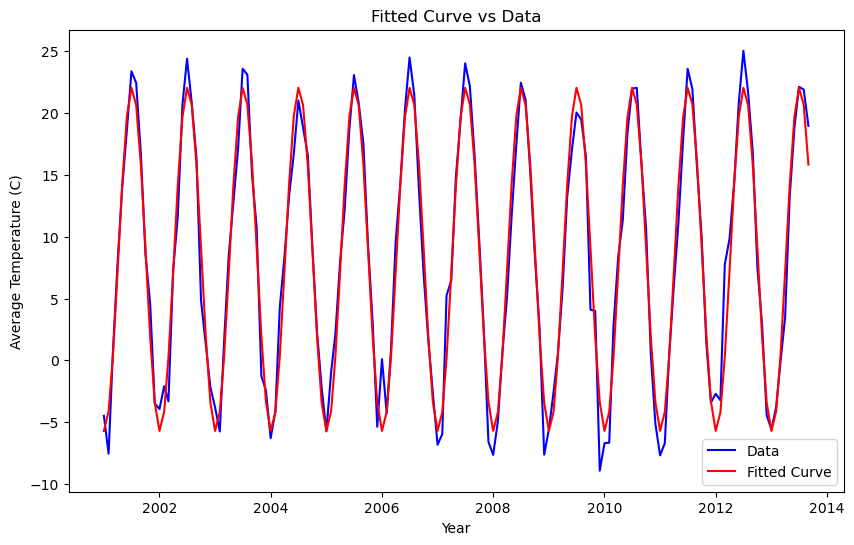

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_data['dt'], y_data, label='Data', color='blue')
fitted_y = model_func(x_data, *params)
plt.plot(avg_temp_data['dt'], fitted_y, label='Fitted Curve', color='red')
plt.xlabel('Year')
plt.ylabel('Average Temperature (C)')
plt.title('Fitted Curve vs Data')
plt.legend()
plt.show()

In [37]:
for i, (param, error) in enumerate(zip(params, param_errors)):
    print(f'{i + 1}: {param:.4f} ± {error:.4f}')

1: 13.8983 ± 0.2268
2: 0.0172 ± 0.0000
3: 10.2212 ± 9.0052
4: 8.1749 ± 0.1607


In [35]:
a, b, c, d = params
print(f" y = {a:.4f} * cos({b:.4f} * x + {c:.4f}) + {d:.4f}")

 y = 13.8983 * cos(0.0172 * x + 10.2212) + 8.1749


In [39]:
np.random.seed(1)
list1 = np.random.randint(0, 201, 50)
list2 = np.random.randint(0, 201, 50)
list3 = np.random.randint(0, 201, 50)

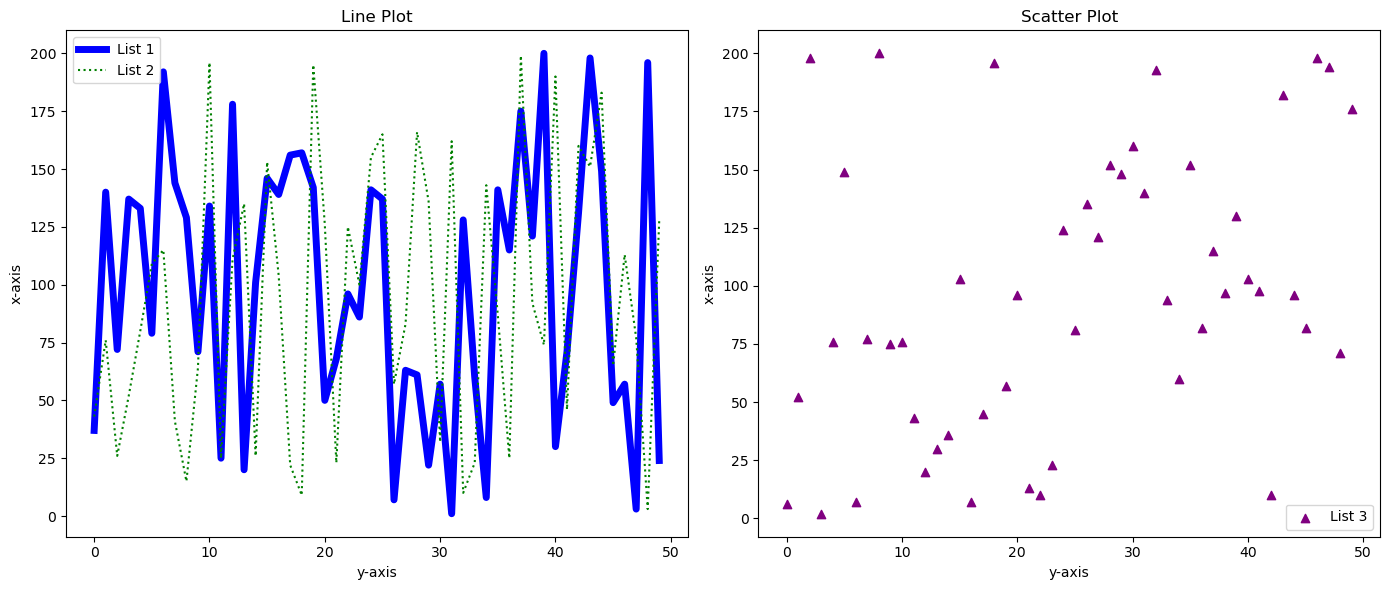

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(list1, label='List 1', color='blue', linewidth=5)
axes[0].plot(list2, label='List 2', color='green', linestyle='dotted')
axes[0].set_title('Line Plot')
axes[0].set_xlabel('y-axis')
axes[0].set_ylabel('x-axis')
axes[0].legend()

axes[1].scatter(range(len(list3)), list3, color='purple', marker='^', label='List 3')
axes[1].set_title('Scatter Plot')
axes[1].set_xlabel('y-axis')
axes[1].set_ylabel('x-axis')
axes[1].legend()

plt.tight_layout()
plt.show()

In [82]:
def estimate_pi(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    inside_circle = x**2 + y**2 <= 1
    pi_estimate = 4 * np.sum(inside_circle) / N
    return pi_estimate, x, y, inside_circle

N_values = [10, 1000, 100000, 1000000]
for N in N_values:
    pi_estimate, _, _, _ = estimate_pi(N)
    print(pi_estimate)
#The higher the value of N, the more accurate the calcultion of pi

3.2
3.148
3.14344
3.141884


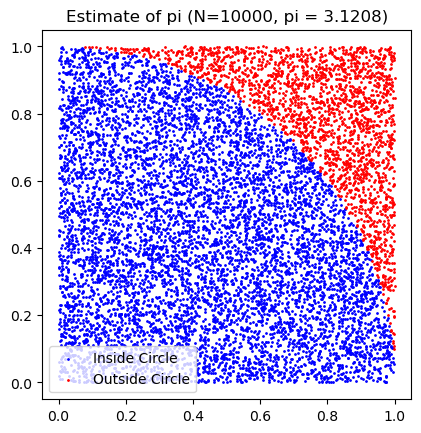

In [92]:
N = 10000
pi_estimate, x, y, inside_circle = estimate_pi(N)

plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label='Inside Circle')
plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label='Outside Circle')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"Estimate of pi (N={N}, pi = {pi_estimate:.4f})")
plt.legend()
plt.show()